*Initially created at 26.02.2018 by Petteri Nevavuori (<petteri.nevavuori@mtech.fi>)*

---

# ML II. Building the CNN

In this notebook we'll cover the implementation of our CNN. We will show various methods for instantiating the model and training it as well. We'll also cover the implementations of cross-validation and early stopping, with other dynamic features.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Overview" data-toc-modified-id="1.-Overview-1">1. Overview</a></span><ul class="toc-item"><li><span><a href="#1.1-Initializing-with-basic-setup" data-toc-modified-id="1.1-Initializing-with-basic-setup-1.1">1.1 Initializing with basic setup</a></span></li><li><span><a href="#1.2-Training-with-basic-setup" data-toc-modified-id="1.2-Training-with-basic-setup-1.2">1.2 Training with basic setup</a></span></li><li><span><a href="#1.3-Initializing-with-Optimizer" data-toc-modified-id="1.3-Initializing-with-Optimizer-1.3">1.3 Initializing with Optimizer</a></span></li><li><span><a href="#1.4-Initializing-with-Optimizer-parameters-only" data-toc-modified-id="1.4-Initializing-with-Optimizer-parameters-only-1.4">1.4 Initializing with Optimizer parameters only</a></span></li><li><span><a href="#1.5-Initializing-with-custom-layer-sizes" data-toc-modified-id="1.5-Initializing-with-custom-layer-sizes-1.5">1.5 Initializing with custom layer sizes</a></span></li><li><span><a href="#1.6-Training-with-varying-input-sizes" data-toc-modified-id="1.6-Training-with-varying-input-sizes-1.6">1.6 Training with varying input sizes</a></span><ul class="toc-item"><li><span><a href="#1.6.1-64x64-images" data-toc-modified-id="1.6.1-64x64-images-1.6.1">1.6.1 64x64 images</a></span></li><li><span><a href="#1.6.2-128x128-images" data-toc-modified-id="1.6.2-128x128-images-1.6.2">1.6.2 128x128 images</a></span></li></ul></li><li><span><a href="#1.7-Training-with-varying-input-bands" data-toc-modified-id="1.7-Training-with-varying-input-bands-1.7">1.7 Training with varying input bands</a></span><ul class="toc-item"><li><span><a href="#1.7.1-32x32-images" data-toc-modified-id="1.7.1-32x32-images-1.7.1">1.7.1 32x32 images</a></span></li><li><span><a href="#1.7.2-64x64-images" data-toc-modified-id="1.7.2-64x64-images-1.7.2">1.7.2 64x64 images</a></span></li><li><span><a href="#1.7.3-128x128-images" data-toc-modified-id="1.7.3-128x128-images-1.7.3">1.7.3 128x128 images</a></span></li></ul></li></ul></li><li><span><a href="#2.-Implementing-Cross-Validation" data-toc-modified-id="2.-Implementing-Cross-Validation-2">2. Implementing Cross-Validation</a></span><ul class="toc-item"><li><span><a href="#2.1-Training-without-CV" data-toc-modified-id="2.1-Training-without-CV-2.1">2.1 Training without CV</a></span></li><li><span><a href="#2.2-Training-with-CV" data-toc-modified-id="2.2-Training-with-CV-2.2">2.2 Training with CV</a></span><ul class="toc-item"><li><span><a href="#2.2.1-Error-test:-Undefined-$k$" data-toc-modified-id="2.2.1-Error-test:-Undefined-$k$-2.2.1">2.2.1 Error test: Undefined $k$</a></span></li><li><span><a href="#2.2.2-Error-test:-Dataset-not-a-Dataset-instance" data-toc-modified-id="2.2.2-Error-test:-Dataset-not-a-Dataset-instance-2.2.2">2.2.2 Error test: Dataset not a <code>Dataset</code> instance</a></span></li><li><span><a href="#2.2.3-Debug-training-with-32x32-images" data-toc-modified-id="2.2.3-Debug-training-with-32x32-images-2.2.3">2.2.3 Debug training with 32x32 images</a></span></li><li><span><a href="#2.2.4-Debug-training--with-64x64-images" data-toc-modified-id="2.2.4-Debug-training--with-64x64-images-2.2.4">2.2.4 Debug training  with 64x64 images</a></span></li><li><span><a href="#2.2.5-Debug-training-with-128x128-images" data-toc-modified-id="2.2.5-Debug-training-with-128x128-images-2.2.5">2.2.5 Debug training with 128x128 images</a></span></li><li><span><a href="#2.2.4-Training-with-default-network-topology" data-toc-modified-id="2.2.4-Training-with-default-network-topology-2.2.6">2.2.4 Training with default network topology</a></span></li><li><span><a href="#2.2.5-Training-with-deeper-network" data-toc-modified-id="2.2.5-Training-with-deeper-network-2.2.7">2.2.5 Training with deeper network</a></span></li></ul></li></ul></li><li><span><a href="#3.-Implementing-Early-Stopping" data-toc-modified-id="3.-Implementing-Early-Stopping-3">3. Implementing Early Stopping</a></span><ul class="toc-item"><li><span><a href="#3.1-Retraining-with-best-model" data-toc-modified-id="3.1-Retraining-with-best-model-3.1">3.1 Retraining with best model</a></span><ul class="toc-item"><li><span><a href="#Continued-training" data-toc-modified-id="Continued-training-3.1.1">Continued training</a></span></li><li><span><a href="#Training-a-persisted-model" data-toc-modified-id="Training-a-persisted-model-3.1.2">Training a persisted model</a></span></li></ul></li></ul></li><li><span><a href="#4.-Putting-it-all-together" data-toc-modified-id="4.-Putting-it-all-together-4">4. Putting it all together</a></span><ul class="toc-item"><li><span><a href="#4.1-32x32-NDVI-images" data-toc-modified-id="4.1-32x32-NDVI-images-4.1">4.1 32x32 NDVI images</a></span></li><li><span><a href="#4.2-32x32-RGB-images" data-toc-modified-id="4.2-32x32-RGB-images-4.2">4.2 32x32 RGB images</a></span></li><li><span><a href="#4.3-128x128-RGB-images" data-toc-modified-id="4.3-128x128-RGB-images-4.3">4.3 128x128 RGB images</a></span></li></ul></li></ul></div>

## 1. Overview

As the images are rather small, we must ensure that the we dont' overly squash the feature map dimensions as it will generate problems. Some implementation details are derived from the paper ImageNet classification with deep convolutional neural networks (2017) by Krizhevsky et al. These include:

- Rectified linear units (*ReLU*) after every convolution operation.
- Batch normalization before linear rectification.
- No max pooling in CNN hidden layers.
- CNN hidden layers don't increase feature maps.
- CNN connected to two fully connected layers.

On top of these, we'll employ the following:

- Convolutions will retain image dimensions.
    - Zero padding to achieve *same* convolution.
    - 5x5 kernels.
- No bias in convolution operations due to Batch Normalization.
- Cross-validation during training.
- A form of regularization, some options:
    - Weight decay in the optimizer - inherent in the optimizer.
    - Early stopping - implemented separately.
    - Dropout - not yet decided upon.

A visual representation of the network is below. The $B$ refers to number of bands, which can be  one for NDVI and 3 for RGB images. The $D$ then refers to the dimensions of the input image.

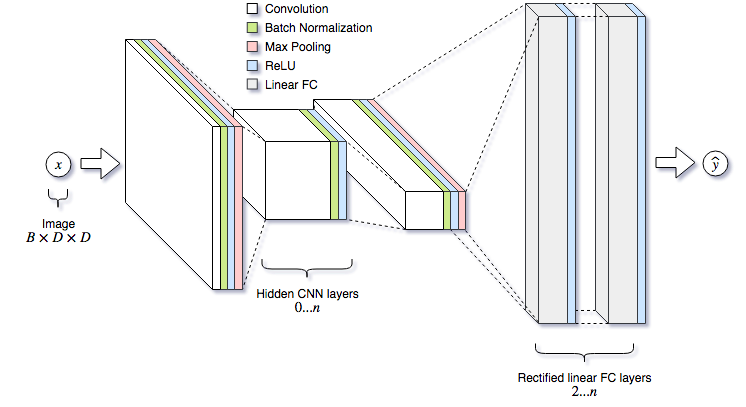

As the generation of training and validation datasets has already been addressed in the preceding notebook, there's nothing much more to cover. The training and validation datasets are retrievable through a single Dataset's function call. Thus we'll quickly move on to implementing the CNN and testing it. 

### 1.1 Initializing with basic setup

Next up is the initialization of the proposed CNN without any fancy tricks. We'll try first with a debug run and print out the layers and intermediate output sizes.

In [1]:
from field_analysis.model.nets.cnn import DroneYieldMeanCNN
%matplotlib inline

cnn = DroneYieldMeanCNN(
    source_bands=1, 
    source_dim=32,
    debug=True)

Creating layers:
	CNN output dimensions:
		32(in) -> 16 -> 8(out)
	FC output dimensions:
		8192(in) -> 1024 -> 1(out)
Initializing weights:
	Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False) weights: mean=0.0005, std=0.1956
	BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) weights: mean=0.0146, std=0.1981
	Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False) weights: mean=-0.0001, std=0.2002
	BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) weights: mean=-0.0207, std=0.2083
	Linear(in_features=8192, out_features=1024, bias=True) weights: mean=0.0000, std=0.2000
	Linear(in_features=1024, out_features=1, bias=True) weights: mean=-0.0075, std=0.2041
Initialized DroneYieldMeanCNN(
  (cnn_layers): Sequential(
    (conv0_1_64): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (conv0_1_64_bnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=Tru

Weights are initialized nicely for each layer. As it is evident from the output, the implementation is able to separate the differing sub-networks. We'll see if its able to train the whole network next.

### 1.2 Training with basic setup

We'll initialize and divide the pre-July NDVI dataset as the initial dataset as the testbench. We'll use 32 samples per batch and 90% / 10% division between training and validation datasets. Then we'll run the debug training and inspect the outputs.

In [1]:
from field_analysis.model.dataset.dataperiod import DroneNDVIEarlier
from field_analysis.model.nets.cnn import DroneYieldMeanCNN
%matplotlib inline

batch_size, train_ratio = 32, 0.9

dataset = DroneNDVIEarlier(db_name='field_analysis_10m_32px.db')

training,validation = dataset.separate_train_test(
    batch_size=batch_size, 
    train_ratio=train_ratio)

print("Batch size={}".format(batch_size), end=", ")
print("Train ratio={}".format(train_ratio))
print("Train batches={}".format(len(training)), end=", ")
print("Validation batches={}".format(len(validation)))


cnn = DroneYieldMeanCNN(
    source_bands=1, 
    source_dim=32,
    debug=True)
_ = cnn.train(
    epochs=1, 
    training_data=training, 
    test_data=validation)

Batch size=32, Train ratio=0.9
Train batches=149, Validation batches=17
Creating layers:
	CNN output dimensions:
		32(in) -> 16 -> 8(out)
	FC output dimensions:
		8192(in) -> 1024 -> 1(out)
Initializing weights:
	Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False) weights: mean=-0.0010, std=0.2010
	BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) weights: mean=0.0721, std=0.1786
	Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False) weights: mean=-0.0006, std=0.2001
	BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) weights: mean=-0.0598, std=0.2167
	Linear(in_features=8192, out_features=1024, bias=True) weights: mean=0.0000, std=0.2001
	Linear(in_features=1024, out_features=1, bias=True) weights: mean=0.0005, std=0.1964
Initialized DroneYieldMeanCNN(
  (cnn_layers): Sequential(
    (conv0_1_64): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
   

### 1.3 Initializing with Optimizer

It is also possible to provide an optimizer to use with the model. 

In [2]:
from field_analysis.model.nets.cnn import DroneYieldMeanCNN
from torch import optim
%matplotlib inline

cnn = DroneYieldMeanCNN(
    source_bands=1, 
    source_dim=32,
    optimizer=optim.Adadelta,
    optimizer_parameters={'weight_decay':0.1234},
    debug=True)

Creating layers:
	CNN output dimensions:
		32(in) -> 16 -> 8(out)
	FC output dimensions:
		8192(in) -> 1024 -> 1(out)
Initializing weights:
	Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False) weights: mean=-0.0005, std=0.1966
	BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) weights: mean=0.0233, std=0.1808
	Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False) weights: mean=0.0002, std=0.2003
	BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) weights: mean=-0.0087, std=0.1911
	Linear(in_features=8192, out_features=1024, bias=True) weights: mean=-0.0000, std=0.2000
	Linear(in_features=1024, out_features=1, bias=True) weights: mean=-0.0053, std=0.1986
Initialized DroneYieldMeanCNN(
  (cnn_layers): Sequential(
    (conv0_1_64): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (conv0_1_64_bnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=Tr

### 1.4 Initializing with Optimizer parameters only

Next we attempt to input optimizer parameters and see if the network initializes as expected.

In [3]:
from field_analysis.model.nets.cnn import DroneYieldMeanCNN
%matplotlib inline

cnn = DroneYieldMeanCNN(
    source_bands=1, 
    source_dim=32,
    optimizer_parameters={'lr':1e-15,'weight_decay':0.2},
    debug=True)

Creating layers:
	CNN output dimensions:
		32(in) -> 16 -> 8(out)
	FC output dimensions:
		8192(in) -> 1024 -> 1(out)
Initializing weights:
	Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False) weights: mean=0.0065, std=0.2030
	BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) weights: mean=-0.0072, std=0.2011
	Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False) weights: mean=-0.0002, std=0.2002
	BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) weights: mean=-0.0116, std=0.2088
	Linear(in_features=8192, out_features=1024, bias=True) weights: mean=-0.0001, std=0.2000
	Linear(in_features=1024, out_features=1, bias=True) weights: mean=0.0022, std=0.1929
Initialized DroneYieldMeanCNN(
  (cnn_layers): Sequential(
    (conv0_1_64): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (conv0_1_64_bnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=Tr

The parameters are passed along just nicely! Nice!

### 1.5 Initializing with custom layer sizes

We also want to test if the network is indeed dynamically initializable layer wise.

In [4]:
from field_analysis.model.nets.cnn import DroneYieldMeanCNN
%matplotlib inline

cnn = DroneYieldMeanCNN(
    source_bands=1, 
    source_dim=32,
    cnn_layers=5,
    fc_layers=5,
    debug=True)

Creating layers:
	CNN output dimensions:
		32(in) -> 16 -> 16 -> 16 -> 16 -> 8(out)
	FC output dimensions:
		8192(in) -> 1024 -> 1024 -> 1024 -> 1024 -> 1(out)
Initializing weights:
	Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False) weights: mean=-0.0035, std=0.1995
	BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) weights: mean=-0.0260, std=0.2082
	Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False) weights: mean=0.0009, std=0.2004
	BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) weights: mean=-0.0211, std=0.1982
	Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False) weights: mean=0.0001, std=0.2005
	BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) weights: mean=0.0025, std=0.1409
	Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False) weights: mean=-0.0001, std=0.2004
	BatchNorm2d(64, eps=1e-0

The layers are separable by the names splendidly!

### 1.6 Training with varying input sizes

We must also test the CNN with varying input image dimensions. Let's try them out.

#### 1.6.1 64x64 images

In [5]:
from field_analysis.model.dataset.dataperiod import DroneNDVIEarlier
from field_analysis.model.nets.cnn import DroneYieldMeanCNN
%matplotlib inline

batch_size, train_ratio = 32, 0.9

dataset = DroneNDVIEarlier(db_name='field_analysis_20m_64px.db')

training, validation = dataset.separate_train_test(
    batch_size=batch_size,
    train_ratio=train_ratio)

print("Batch size={}".format(batch_size), end=", ")
print("Train ratio={}".format(train_ratio))
print("Train batches={}".format(len(training)), end=", ")
print("Validation batches={}".format(len(validation)))

cnn = DroneYieldMeanCNN(
    source_bands=1,
    source_dim=64,
    debug=True)
_ = cnn.train(
    epochs=1,
    training_data=training,
    test_data=validation)

Batch size=32, Train ratio=0.9
Train batches=150, Validation batches=17
Creating layers:
	CNN output dimensions:
		64(in) -> 16 -> 8(out)
	FC output dimensions:
		8192(in) -> 1024 -> 1(out)
Initializing weights:
	Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False) weights: mean=0.0033, std=0.2030
	BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) weights: mean=0.0006, std=0.1940
	Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False) weights: mean=0.0004, std=0.2006
	BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) weights: mean=0.0160, std=0.1893
	Linear(in_features=8192, out_features=1024, bias=True) weights: mean=-0.0000, std=0.2000
	Linear(in_features=1024, out_features=1, bias=True) weights: mean=0.0065, std=0.2025
Initialized DroneYieldMeanCNN(
  (cnn_layers): Sequential(
    (conv0_1_64): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (

#### 1.6.2 128x128 images

In [6]:
from field_analysis.model.dataset.dataperiod import DroneNDVIEarlier
from field_analysis.model.nets.cnn import DroneYieldMeanCNN
%matplotlib inline

batch_size, train_ratio = 32, 0.9

dataset = DroneNDVIEarlier(db_name='field_analysis_40m_128px.db')

training, validation = dataset.separate_train_test(
    batch_size=batch_size,
    train_ratio=train_ratio)

print("Batch size={}".format(batch_size), end=", ")
print("Train ratio={}".format(train_ratio))
print("Train batches={}".format(len(training)), end=", ")
print("Validation batches={}".format(len(validation)))

cnn = DroneYieldMeanCNN(
    source_bands=1,
    source_dim=128,
    debug=True)
_ = cnn.train(
    epochs=1,
    training_data=training,
    test_data=validation)

Batch size=32, Train ratio=0.9
Train batches=149, Validation batches=17
Creating layers:
	CNN output dimensions:
		128(in) -> 16 -> 8(out)
	FC output dimensions:
		8192(in) -> 1024 -> 1(out)
Initializing weights:
	Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False) weights: mean=-0.0039, std=0.2022
	BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) weights: mean=-0.0097, std=0.1565
	Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False) weights: mean=0.0002, std=0.1999
	BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) weights: mean=0.0291, std=0.1769
	Linear(in_features=8192, out_features=1024, bias=True) weights: mean=0.0001, std=0.1999
	Linear(in_features=1024, out_features=1, bias=True) weights: mean=0.0026, std=0.2039
Initialized DroneYieldMeanCNN(
  (cnn_layers): Sequential(
    (conv0_1_64): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
   

### 1.7 Training with varying input bands

We must also make sure that we are able to train with RGB images too.

#### 1.7.1 32x32 images

In [7]:
from field_analysis.model.dataset.dataperiod import DroneRGBEarlier
from field_analysis.model.nets.cnn import DroneYieldMeanCNN
%matplotlib inline

batch_size, train_ratio = 32, 0.9

dataset = DroneRGBEarlier(db_name='field_analysis_10m_32px.db')

training, validation = dataset.separate_train_test(
    batch_size=batch_size,
    train_ratio=train_ratio)

print("Batch size={}".format(batch_size), end=", ")
print("Train ratio={}".format(train_ratio))
print("Train batches={}".format(len(training)), end=", ")
print("Validation batches={}".format(len(validation)))

cnn = DroneYieldMeanCNN(
    source_bands=3,
    source_dim=32,
    debug=True)
_ = cnn.train(
    epochs=1,
    training_data=training,
    test_data=validation)

Batch size=32, Train ratio=0.9
Train batches=148, Validation batches=17
Creating layers:
	CNN output dimensions:
		32(in) -> 16 -> 8(out)
	FC output dimensions:
		8192(in) -> 1024 -> 1(out)
Initializing weights:
	Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False) weights: mean=-0.0013, std=0.2030
	BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) weights: mean=0.0185, std=0.2028
	Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False) weights: mean=0.0003, std=0.2008
	BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) weights: mean=0.0235, std=0.1974
	Linear(in_features=8192, out_features=1024, bias=True) weights: mean=0.0001, std=0.2000
	Linear(in_features=1024, out_features=1, bias=True) weights: mean=-0.0018, std=0.2010
Initialized DroneYieldMeanCNN(
  (cnn_layers): Sequential(
    (conv0_3_64): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    

#### 1.7.2 64x64 images

In [8]:
from field_analysis.model.dataset.dataperiod import DroneRGBEarlier
from field_analysis.model.nets.cnn import DroneYieldMeanCNN
%matplotlib inline

batch_size, train_ratio = 32, 0.9

dataset = DroneRGBEarlier(db_name='field_analysis_20m_64px.db')

training, validation = dataset.separate_train_test(
    batch_size=batch_size,
    train_ratio=train_ratio)

print("Batch size={}".format(batch_size), end=", ")
print("Train ratio={}".format(train_ratio))
print("Train batches={}".format(len(training)), end=", ")
print("Validation batches={}".format(len(validation)))

cnn = DroneYieldMeanCNN(
    source_bands=3,
    source_dim=64,
    debug=True)
_ = cnn.train(
    epochs=1,
    training_data=training,
    test_data=validation)

Batch size=32, Train ratio=0.9
Train batches=148, Validation batches=17
Creating layers:
	CNN output dimensions:
		64(in) -> 16 -> 8(out)
	FC output dimensions:
		8192(in) -> 1024 -> 1(out)
Initializing weights:
	Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False) weights: mean=-0.0005, std=0.2018
	BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) weights: mean=0.0083, std=0.1805
	Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False) weights: mean=0.0009, std=0.2002
	BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) weights: mean=0.0245, std=0.2163
	Linear(in_features=8192, out_features=1024, bias=True) weights: mean=-0.0001, std=0.2000
	Linear(in_features=1024, out_features=1, bias=True) weights: mean=0.0060, std=0.2065
Initialized DroneYieldMeanCNN(
  (cnn_layers): Sequential(
    (conv0_3_64): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    

#### 1.7.3 128x128 images

In [9]:
from field_analysis.model.dataset.dataperiod import DroneRGBEarlier
from field_analysis.model.nets.cnn import DroneYieldMeanCNN
%matplotlib inline

batch_size, train_ratio = 32, 0.9

dataset = DroneRGBEarlier(db_name='field_analysis_40m_128px.db')

training, validation = dataset.separate_train_test(
    batch_size=batch_size,
    train_ratio=train_ratio)

print("Batch size={}".format(batch_size), end=", ")
print("Train ratio={}".format(train_ratio))
print("Train batches={}".format(len(training)), end=", ")
print("Validation batches={}".format(len(validation)))

cnn = DroneYieldMeanCNN(
    source_bands=3,
    source_dim=128,
    debug=True)
_ = cnn.train(
    epochs=1,
    training_data=training,
    test_data=validation)

Batch size=32, Train ratio=0.9
Train batches=148, Validation batches=17
Creating layers:
	CNN output dimensions:
		128(in) -> 16 -> 8(out)
	FC output dimensions:
		8192(in) -> 1024 -> 1(out)
Initializing weights:
	Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False) weights: mean=0.0051, std=0.2043
	BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) weights: mean=-0.0067, std=0.1989
	Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False) weights: mean=0.0000, std=0.2000
	BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) weights: mean=0.0373, std=0.2054
	Linear(in_features=8192, out_features=1024, bias=True) weights: mean=-0.0001, std=0.2000
	Linear(in_features=1024, out_features=1, bias=True) weights: mean=-0.0041, std=0.1944
Initialized DroneYieldMeanCNN(
  (cnn_layers): Sequential(
    (conv0_3_64): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
  

## 2. Implementing Cross-Validation

Next up is implementing the CV. Here we'll also perform first full trainings and see the outputs.

### 2.1 Training without CV

First we test out the training with distinct training and test sets.  We will also count the number of trainable parameters for our test network.

Starting the training with GPU:
[   1/   3] (0m  3s) 	Mean Loss:	Train=3295.15 +-2848.15	Test=1117.35 +-1034.17
[   2/   3] (0m  5s) 	Mean Loss:	Train=1133.85 +-1077.38	Test=1084.60 +-997.52
[   3/   3] (0m  7s) 	Mean Loss:	Train=1102.07 +-1044.85	Test=1037.29 +-956.77
Saving the model to /home/nevavuor/crop-field-cnn/models/20181215_150720136_SGD_1x32x32_2cnn_2fc.pkl
Best Test Loss: 1037.29


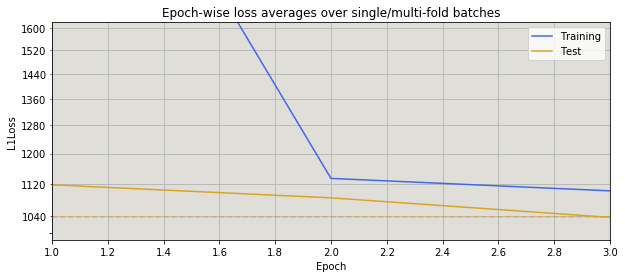

Total number of learnable parameters: 8597441


In [1]:
from field_analysis.model.dataset.dataperiod import DroneNDVIEarlier
from field_analysis.model.nets.cnn import DroneYieldMeanCNN
%matplotlib inline

batch_size, train_ratio = 32, 0.9
dataset = DroneNDVIEarlier(db_name='field_analysis_10m_32px.db')
training, test = dataset.separate_train_test(
    batch_size=batch_size, train_ratio=train_ratio)

cnn = DroneYieldMeanCNN(
    source_bands=1, 
    source_dim=32)
_ = cnn.train(
    epochs=3, 
    training_data=training, 
    test_data=test)

print("Total number of learnable parameters: ",end="")
params_sum = 0
for parameter in cnn.parameters():
    params_sum += parameter.view(-1).size()[0]
print(params_sum)

The training also proceeds well with even GPU! It is extremely important, as the CPU-only training times are massively higher. We are also able to output the number of learnable parameters, which is nice as well.

### 2.2 Training with CV

Then we'll want to test the use of cross-validation in our training. Our validation isn't that large, as our training datasets comprise only of about 6000 samples. Thus we're better off taking test loss averages over single values for improved statistical certainty. 

#### 2.2.1 Error test: Undefined $k$

If no number of folds is defined, the training will not have all the necessary information to continue. Let's thus first test if we get a proper error with only training dataset as the input parameter.

In [2]:
from field_analysis.model.nets.cnn import DroneYieldMeanCNN
from field_analysis.model.dataset.dataperiod import DroneNDVIEarlier
%matplotlib inline

dataset = DroneNDVIEarlier(db_name='field_analysis_10m_32px.db')

cnn = DroneYieldMeanCNN(
    source_bands=1, 
    source_dim=32)
_ = cnn.train(
    epochs=1, 
    training_data=dataset)

Starting the training with GPU:


ValueError: You need to specify `k_cv_folds` if no `test_data` is provided.

So we indeed get an error saying that the number or the $k$ of folds needs to specified when working only with a training dataset. Great. 

#### 2.2.2 Error test: Dataset not a `Dataset` instance

Second crucial thing is that for the CV to work as intended, the training must be able to reindex training and test sets created on-the-fly. This is impossible with `DataLoader` instances, as they are only iterators that do not allow for index-based item retrieval.

In [3]:
from field_analysis.model.nets.cnn import DroneYieldMeanCNN
from field_analysis.model.dataset.dataperiod import DroneNDVIEarlier
%matplotlib inline

dataset = DroneNDVIEarlier(db_name='field_analysis_10m_32px.db')

cnn = DroneYieldMeanCNN(
    source_bands=1, 
    source_dim=32)
_ = cnn.train(
    epochs=1, 
    training_data=dataset.to_batches(batch_size=16),
    k_cv_folds=5)

Starting the training with GPU:


TypeError: Only instances of `Dataset` allowed, as pre-batching messes CV fold-wise reindexing, inbound dataset type=<class 'torch.utils.data.dataloader.DataLoader'>

Produced error text is informative enough.

#### 2.2.3 Debug training with 32x32 images

In [4]:
from field_analysis.model.nets.cnn import DroneYieldMeanCNN
from field_analysis.model.dataset.dataperiod import DroneNDVIEarlier
%matplotlib inline

dataset = DroneNDVIEarlier(db_name='field_analysis_10m_32px.db')

cnn = DroneYieldMeanCNN(
    source_bands=1, 
    source_dim=32,
    debug=True)
_ = cnn.train(
    epochs=1, 
    training_data=dataset,
    k_cv_folds=3)

Creating layers:
	CNN output dimensions:
		32(in) -> 16 -> 8(out)
	FC output dimensions:
		8192(in) -> 1024 -> 1(out)
Initializing weights:
	Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False) weights: mean=-0.0001, std=0.2003
	BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) weights: mean=-0.0138, std=0.2153
	Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False) weights: mean=0.0005, std=0.2000
	BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) weights: mean=0.0079, std=0.2072
	Linear(in_features=8192, out_features=1024, bias=True) weights: mean=-0.0000, std=0.2000
	Linear(in_features=1024, out_features=1, bias=True) weights: mean=-0.0074, std=0.1995
Initialized DroneYieldMeanCNN(
  (cnn_layers): Sequential(
    (conv0_1_64): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (conv0_1_64_bnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=Tr

Exception ignored in: <function _DataLoaderIter.__del__ at 0x2ad0dd36f8c8>
Traceback (most recent call last):
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/multiprocessing/resource_sharer.py", line 58, in detach
    return reduction.recv_handle(conn)
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/multiprocessing/reduction.py", line 185, in recv_handle

	Test batch:
		Input type=Tensor, shape=torch.Size([128, 1, 32, 32])
		Targets type=Tensor, shape=torch.Size([128])
		Targets=[6868.25341796875, 7539.107421875, 4168.9404296875] ...
		Forward pass:
			Post-CNN shape=torch.Size([128, 128, 8, 8])
			Pre-FC shape=torch.Size([128, 8192])
		Predictions type=Tensor, shape=torch.Size([128, 1])
		Predictions=[0.0, 0.0, 0.0] ...
		Loss=[6868.25341796875, 7539.107421875, 4168.9404296875]
	Test batch:
		Input type=Tensor, shape=torch.Size([128, 1, 32, 32])
		Targets type=Tensor, shape=torch.Size([128])
		Targets=[5831.66064453125, 5901.0322265625, 7223.35009765625] ...
		Forward pass:
			Post-CNN shape=torch.Size([128, 128, 8, 8])
			Pre-FC shape=torch.Size([128, 8192])
		Predictions type=Tensor, shape=torch.Size([128, 1])
		Predictions=[0.0, 0.0, 0.0] ...
		Loss=[5831.66064453125, 5901.0322265625, 7223.35009765625]
		Losses=[6868.25341796875, 7539.107421875, 4168.9404296875]
Performing CV 2:
	Training set: samples=2202
	Training batch:
		Input t

Exception ignored in: <function _DataLoaderIter.__del__ at 0x2ad0dd36f8c8>
Traceback (most recent call last):
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/multiprocessing/resource_sharer.py", line 58, in detach
    return reduction.recv_handle(conn)
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/multiprocessing/reduction.py", line 185, in recv_handle

	Test batch:
		Input type=Tensor, shape=torch.Size([128, 1, 32, 32])
		Targets type=Tensor, shape=torch.Size([128])
		Targets=[6965.326171875, 7565.30712890625, 7605.57958984375] ...
		Forward pass:
			Post-CNN shape=torch.Size([128, 128, 8, 8])
			Pre-FC shape=torch.Size([128, 8192])
		Predictions type=Tensor, shape=torch.Size([128, 1])
		Predictions=[0.0, 0.0, 0.0] ...
		Loss=[6965.326171875, 7565.30712890625, 7605.57958984375]
	Test batch:
		Input type=Tensor, shape=torch.Size([128, 1, 32, 32])
		Targets type=Tensor, shape=torch.Size([128])
		Targets=[7872.66162109375, 5894.1201171875, 9053.7099609375] ...
		Forward pass:
			Post-CNN shape=torch.Size([128, 128, 8, 8])
			Pre-FC shape=torch.Size([128, 8192])
		Predictions type=Tensor, shape=torch.Size([128, 1])
		Predictions=[0.0, 0.0, 0.0] ...
		Loss=[7872.66162109375, 5894.1201171875, 9053.7099609375]
		Losses=[6965.326171875, 7565.30712890625, 7605.57958984375]
Performing CV 3:
	Training set: samples=3524


Exception ignored in: <function _DataLoaderIter.__del__ at 0x2ad0dd36f8c8>
Traceback (most recent call last):
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/multiprocessing/resource_sharer.py", line 58, in detach
    return reduction.recv_handle(conn)
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/multiprocessing/reduction.py", line 185, in recv_handle

	Training batch:
		Input type=Tensor, shape=torch.Size([128, 1, 32, 32])
		Targets type=Tensor, shape=torch.Size([128])
		Targets=[2994.63525390625, 7375.76416015625, 5610.2607421875] ...
		Forward pass:
			Post-CNN shape=torch.Size([128, 128, 8, 8])
			Pre-FC shape=torch.Size([128, 8192])
		Predictions type=Tensor, shape=torch.Size([128, 1])
		Predictions=[0.0, 0.0, 0.0] ...
		Loss=[2994.63525390625, 7375.76416015625, 5610.2607421875]
	Training batch:
		Input type=Tensor, shape=torch.Size([128, 1, 32, 32])
		Targets type=Tensor, shape=torch.Size([128])
		Targets=[7236.06884765625, 5423.6552734375, 5636.82177734375] ...
		Forward pass:
			Post-CNN shape=torch.Size([128, 128, 8, 8])
			Pre-FC shape=torch.Size([128, 8192])
		Predictions type=Tensor, shape=torch.Size([128, 1])
		Predictions=[0.0, 0.0, 0.0] ...
		Loss=[7236.06884765625, 5423.6552734375, 5636.82177734375]
		Losses=[2994.63525390625, 7375.76416015625, 5610.2607421875]
	Test set: samples=440, samples_idx_start=3524


Exception ignored in: <function _DataLoaderIter.__del__ at 0x2ad0dd36f8c8>
Traceback (most recent call last):
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/multiprocessing/resource_sharer.py", line 58, in detach
    return reduction.recv_handle(conn)
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/multiprocessing/reduction.py", line 185, in recv_handle

	Test batch:
		Input type=Tensor, shape=torch.Size([128, 1, 32, 32])
		Targets type=Tensor, shape=torch.Size([128])
		Targets=[6550.66015625, 6030.64697265625, 4899.5830078125] ...
		Forward pass:
			Post-CNN shape=torch.Size([128, 128, 8, 8])
			Pre-FC shape=torch.Size([128, 8192])
		Predictions type=Tensor, shape=torch.Size([128, 1])
		Predictions=[0.0, 0.0, 0.0] ...
		Loss=[6550.66015625, 6030.64697265625, 4899.5830078125]
	Test batch:
		Input type=Tensor, shape=torch.Size([128, 1, 32, 32])
		Targets type=Tensor, shape=torch.Size([128])
		Targets=[8132.02001953125, 7337.18603515625, 7208.1513671875] ...
		Forward pass:
			Post-CNN shape=torch.Size([128, 128, 8, 8])
			Pre-FC shape=torch.Size([128, 8192])
		Predictions type=Tensor, shape=torch.Size([128, 1])
		Predictions=[0.0, 0.0, 0.0] ...
		Loss=[8132.02001953125, 7337.18603515625, 7208.1513671875]
		Losses=[6550.66015625, 6030.64697265625, 4899.5830078125]
	Test batch:
		Input type=Tensor, shape=torch.Size([128, 1, 32, 32])
		Tar

#### 2.2.4 Debug training  with 64x64 images

In [5]:
from field_analysis.model.nets.cnn import DroneYieldMeanCNN
from field_analysis.model.dataset.dataperiod import DroneRGBEarlier
%matplotlib inline

dataset = DroneRGBEarlier(db_name='field_analysis_20m_64px.db')

cnn = DroneYieldMeanCNN(
    source_bands=3, 
    source_dim=64,
    debug=True)
_ = cnn.train(
    epochs=1, 
    training_data=dataset,
    k_cv_folds=3)

Creating layers:
	CNN output dimensions:
		64(in) -> 16 -> 8(out)
	FC output dimensions:
		8192(in) -> 1024 -> 1(out)
Initializing weights:
	Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False) weights: mean=-0.0006, std=0.1981
	BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) weights: mean=0.0066, std=0.2109
	Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False) weights: mean=0.0005, std=0.1995
	BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) weights: mean=0.0355, std=0.2048
	Linear(in_features=8192, out_features=1024, bias=True) weights: mean=0.0000, std=0.2001
	Linear(in_features=1024, out_features=1, bias=True) weights: mean=0.0021, std=0.2091
Initialized DroneYieldMeanCNN(
  (cnn_layers): Sequential(
    (conv0_3_64): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (conv0_3_64_bnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True,

Exception ignored in: <function _DataLoaderIter.__del__ at 0x2ad0dd36f8c8>
Traceback (most recent call last):
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/multiprocessing/resource_sharer.py", line 58, in detach
    return reduction.recv_handle(conn)
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/multiprocessing/reduction.py", line 185, in recv_handle

	Test batch:
		Input type=Tensor, shape=torch.Size([128, 3, 64, 64])
		Targets type=Tensor, shape=torch.Size([128])
		Targets=[6049.99658203125, 9255.3505859375, 9686.9609375] ...
		Forward pass:
			Post-CNN shape=torch.Size([128, 128, 8, 8])
			Pre-FC shape=torch.Size([128, 8192])
		Predictions type=Tensor, shape=torch.Size([128, 1])
		Predictions=[8.532096862792969, 10.373372077941895, 15.764073371887207] ...
		Loss=[6041.46435546875, 9244.9775390625, 9671.197265625]
	Test batch:
		Input type=Tensor, shape=torch.Size([128, 3, 64, 64])
		Targets type=Tensor, shape=torch.Size([128])
		Targets=[6073.91162109375, 5551.6953125, 7416.4033203125] ...
		Forward pass:
			Post-CNN shape=torch.Size([128, 128, 8, 8])
			Pre-FC shape=torch.Size([128, 8192])
		Predictions type=Tensor, shape=torch.Size([128, 1])
		Predictions=[10.880782127380371, 10.867794036865234, 6.746065616607666] ...
		Loss=[6063.03076171875, 5540.82763671875, 7409.6572265625]
		Losses=[6041.46435546875, 9244.9775390625, 9671.

Exception ignored in: <function _DataLoaderIter.__del__ at 0x2ad0dd36f8c8>
Traceback (most recent call last):
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/multiprocessing/resource_sharer.py", line 58, in detach
    return reduction.recv_handle(conn)
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/multiprocessing/reduction.py", line 185, in recv_handle

	Training batch:
		Input type=Tensor, shape=torch.Size([128, 3, 64, 64])
		Targets type=Tensor, shape=torch.Size([128])
		Targets=[3578.62744140625, 6703.45458984375, 4314.29345703125] ...
		Forward pass:
			Post-CNN shape=torch.Size([128, 128, 8, 8])
			Pre-FC shape=torch.Size([128, 8192])
		Predictions type=Tensor, shape=torch.Size([128, 1])
		Predictions=[28.353649139404297, 0.0, 28.81924057006836] ...
		Loss=[3550.273681640625, 6703.45458984375, 4285.47412109375]
	Training batch:
		Input type=Tensor, shape=torch.Size([128, 3, 64, 64])
		Targets type=Tensor, shape=torch.Size([128])
		Targets=[5153.9990234375, 6165.88525390625, 6083.5986328125] ...
		Forward pass:
			Post-CNN shape=torch.Size([128, 128, 8, 8])
			Pre-FC shape=torch.Size([128, 8192])
		Predictions type=Tensor, shape=torch.Size([128, 1])
		Predictions=[15.415018081665039, 8.312962532043457, 19.200193405151367] ...
		Loss=[5138.583984375, 6157.572265625, 6064.3984375]
		Losses=[3550.273681640625, 6703.45458984375, 4285.

#### 2.2.5 Debug training with 128x128 images

In [6]:
from field_analysis.model.nets.cnn import DroneYieldMeanCNN
from field_analysis.model.dataset.dataperiod import DroneRGBEarlier
%matplotlib inline

dataset = DroneRGBEarlier(db_name='field_analysis_40m_128px.db')

cnn = DroneYieldMeanCNN(
    source_bands=3, 
    source_dim=128,
    debug=True)
_ = cnn.train(
    epochs=1, 
    training_data=dataset,
    k_cv_folds=3)

Creating layers:
	CNN output dimensions:
		128(in) -> 16 -> 8(out)
	FC output dimensions:
		8192(in) -> 1024 -> 1(out)
Initializing weights:
	Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False) weights: mean=-0.0035, std=0.1995
	BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) weights: mean=0.0078, std=0.2362
	Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False) weights: mean=-0.0001, std=0.2002
	BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) weights: mean=0.0044, std=0.2016
	Linear(in_features=8192, out_features=1024, bias=True) weights: mean=0.0001, std=0.2000
	Linear(in_features=1024, out_features=1, bias=True) weights: mean=-0.0058, std=0.2005
Initialized DroneYieldMeanCNN(
  (cnn_layers): Sequential(
    (conv0_3_64): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (conv0_3_64_bnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=Tr

Exception ignored in: <function _DataLoaderIter.__del__ at 0x2ad0dd36f8c8>
Traceback (most recent call last):
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/multiprocessing/resource_sharer.py", line 58, in detach
    return reduction.recv_handle(conn)
  File "/home/nevavuor/.conda/envs/pytorch/lib/python3.7/multiprocessing/reduction.py", line 185, in recv_handle

	Test batch:
		Input type=Tensor, shape=torch.Size([128, 3, 128, 128])
		Targets type=Tensor, shape=torch.Size([128])
		Targets=[8457.349609375, 6072.72216796875, 7508.66552734375] ...
		Forward pass:
			Post-CNN shape=torch.Size([128, 128, 8, 8])
			Pre-FC shape=torch.Size([128, 8192])
		Predictions type=Tensor, shape=torch.Size([128, 1])
		Predictions=[0.0, 0.0, 0.0] ...
		Loss=[8457.349609375, 6072.72216796875, 7508.66552734375]
	Test batch:
		Input type=Tensor, shape=torch.Size([128, 3, 128, 128])
		Targets type=Tensor, shape=torch.Size([128])
		Targets=[8483.9443359375, 7286.12744140625, 5696.52880859375] ...
		Forward pass:
			Post-CNN shape=torch.Size([128, 128, 8, 8])
			Pre-FC shape=torch.Size([128, 8192])
		Predictions type=Tensor, shape=torch.Size([128, 1])
		Predictions=[0.0, 0.0, 0.0] ...
		Loss=[8483.9443359375, 7286.12744140625, 5696.52880859375]
		Losses=[8457.349609375, 6072.72216796875, 7508.66552734375]
Performing CV 2:
	Training set: samples=2187
	Training batch:
		

All seems to be in order. Fold-wise indices change, training and test results are produced and provided as a list in the end. As we're only performing the test run with a single epoch, there's no lines of progress to be visualized. Thus that is our next step. 

#### 2.2.4 Training with default network topology

We'll perform a few epochs and examine the outputs.

Starting the training with GPU:
[   1/   3] (0m  9s) 	Mean Loss:	Train=5355.16 +-2422.94	Test=1837.76 +-1610.46
[   2/   3] (0m 17s) 	Mean Loss:	Train=1176.74 +-1125.75	Test=1755.90 +-1313.12
[   3/   3] (0m 25s) 	Mean Loss:	Train=1124.65 +-1088.07	Test=1710.50 +-1216.76
Saving the model to /home/nevavuor/crop-field-cnn/models/20181215_150840821_SGD_1x32x32_2cnn_2fc.pkl
Best Test Loss: 1710.50


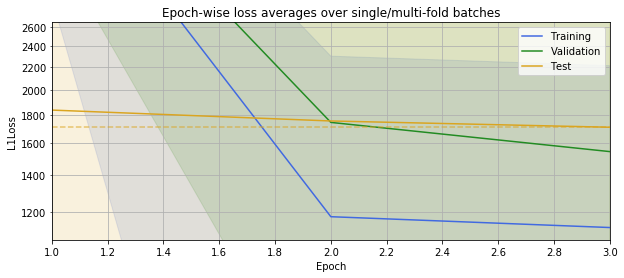

In [7]:
from field_analysis.model.nets.cnn import DroneYieldMeanCNN
from field_analysis.model.dataset.dataperiod import DroneNDVIEarlier
%matplotlib inline

dataset = DroneNDVIEarlier(db_name='field_analysis_10m_32px.db')

cnn = DroneYieldMeanCNN(
    source_bands=1, 
    source_dim=32)
_ = cnn.train(
    epochs=3, 
    training_data=dataset,
    k_cv_folds=3)

The implementation of CV has two immediately clear outcomes. First, the test loss decreases now slower. This is good, as the network has more test data to which to compare its performance against. Second, the training takes much more time. Both of these outcomes were expected. The training is also much smoother, which a definite improvement to the use of pre-determined training and test sets with this sample size.

#### 2.2.5 Training with deeper network

We are also interested in training the model with somewhat deeper network to see if we can get the training error to reduce significantly more than test error. Let's test train one with 9 CNN and 4 FC layers.

Starting the training with GPU:
[   1/   3] (0m 14s) 	Mean Loss:	Train=1813.38 +-1577.79	Test=1472.23 +-1040.74
[   2/   3] (0m 27s) 	Mean Loss:	Train=1507.30 +-1282.94	Test=1055.30 +-954.30
[   3/   3] (0m 39s) 	Mean Loss:	Train=1372.20 +-1247.52	Test=1044.86 +-962.03
Saving the model to /home/nevavuor/crop-field-cnn/models/20181215_150906251_SGD_1x32x32_9cnn_4fc.pkl
Best Test Loss: 1044.86


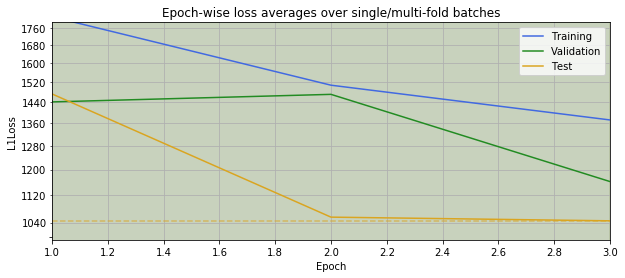

In [8]:
from field_analysis.model.nets.cnn import DroneYieldMeanCNN
from field_analysis.model.dataset.dataperiod import DroneNDVIEarlier
%matplotlib inline

dataset = DroneNDVIEarlier(db_name='field_analysis_10m_32px.db')

cnn = DroneYieldMeanCNN(
    source_bands=1, 
    source_dim=32,
    cnn_layers=9,
    fc_layers=4)
_ = cnn.train(
    epochs=3, 
    training_data=dataset,
    k_cv_folds=3)

## 3. Implementing Early Stopping

Next up is the implementation of early stopping. It is a means to decrease test error without affecting the training error; effectively it is a regularization method. This means that the training must be able to measure a window of either consecutive or strided test losses and determine from those if the test error hasn't decreased enough to continue the training. We must thus also implement the persistence of the best test error producing model.

Starting the training with GPU:
[   1/   3] (0m  9s) 	Mean Loss:	Train=6457.51 +-1673.46	Test=4298.15 +-1733.55
[   2/   3] (0m 16s) 	Mean Loss:	Train=1399.63 +-1328.37	Test=1615.95 +-1285.83
[   3/   3] (0m 24s) 	Mean Loss:	Train=1126.60 +-1085.43	Test=1574.02 +-1251.93
Saving the model to /home/nevavuor/crop-field-cnn/models/20181215_150945956_SGD_1x32x32_2cnn_2fc.pkl
Best Test Loss: 1574.02


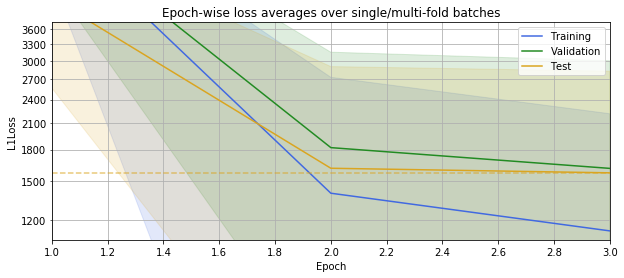

In [9]:
from field_analysis.model.nets.cnn import DroneYieldMeanCNN
from field_analysis.model.dataset.dataperiod import DroneNDVIEarlier
%matplotlib inline

dataset = DroneNDVIEarlier(db_name='field_analysis_10m_32px.db')

cnn = DroneYieldMeanCNN(
    source_bands=1, 
    source_dim=32)
_ = cnn.train(
    epochs=3, 
    training_data=dataset,
    k_cv_folds=3,
    early_stopping_patience=5)

### 3.1 Retraining with best model

We are also interested in training the model further. There are two cases to test here. First is to re-train the already trained model with same model instance. The second is to load a persisted model from file and then train it further.

#### Continued training

Starting the training with GPU:
[   1/   3] (0m  8s) 	Mean Loss:	Train=1141.02 +-1109.74	Test=1592.00 +-1217.83
[   2/   3] (0m 16s) 	Mean Loss:	Train=1134.41 +-1108.55	Test=1570.19 +-1201.12
[   3/   3] (0m 23s) 	Mean Loss:	Train=1125.05 +-1103.47	Test=1506.22 +-1187.45
Saving the model to /home/nevavuor/crop-field-cnn/models/20181215_150945956_SGD_1x32x32_2cnn_2fc.pkl
Best Test Loss: 1506.22


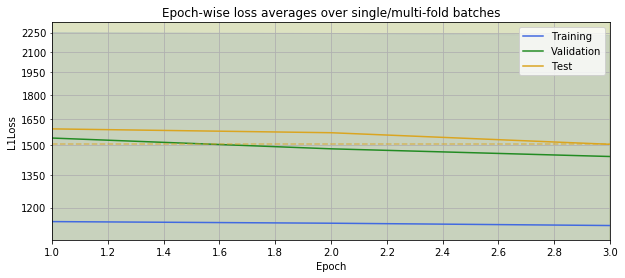

In [10]:
_ = cnn.train(epochs=3, 
    training_data=dataset,
    k_cv_folds=3,
    early_stopping_patience=5)

Continued training progresses even better than anticipated. The we however had to modify the initial setting of using only comparatively better losses to absolute better loss as the early stopping criterion.

Great, it works too! And the initial starting point seems to correspond to that of the continuer training one.

## 4. Putting it all together

The last thing is to test the implementation details together. We will train a bit deeper network with inbound and customized optimizer, utilizing CV and early stopping with the training. We will allow for a larger number of epochs and a higher patience to see, how the training progresses when allowed to continue longer.

### 4.1 32x32 NDVI images

Starting the training with GPU:
[   1/   3] (0m 14s) 	Mean Loss:	Train=1831.82 +-1750.60	Test=1369.90 +-1208.45
[   2/   3] (0m 25s) 	Mean Loss:	Train=1156.41 +-1066.07	Test=1183.78 +-1071.06
[   3/   3] (0m 37s) 	Mean Loss:	Train=1113.76 +-1064.25	Test=1534.52 +-1074.30
Saving the model to /home/nevavuor/crop-field-cnn/models/20181215_151355640_Adadelta_1x32x32_8cnn_2fc.pkl
Best Test Loss: 1183.78


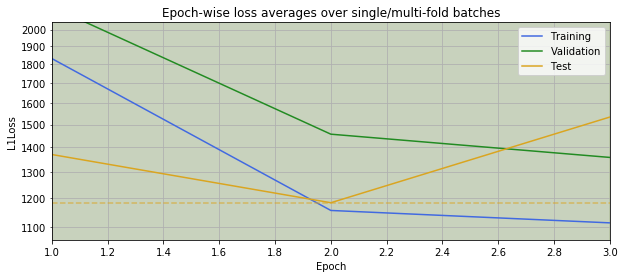

Starting the training with GPU:
[   1/   3] (0m 13s) 	Mean Loss:	Train=1097.88 +-1045.30	Test=1416.22 +-1076.84
[   2/   3] (0m 25s) 	Mean Loss:	Train=1069.73 +-1032.48	Test=1401.94 +-1056.23
[   3/   3] (0m 37s) 	Mean Loss:	Train=1052.98 +-1023.92	Test=1352.76 +-1077.83
Saving the model to /home/nevavuor/crop-field-cnn/models/20181215_151355640_Adadelta_1x32x32_8cnn_2fc.pkl
Best Test Loss: 1183.78


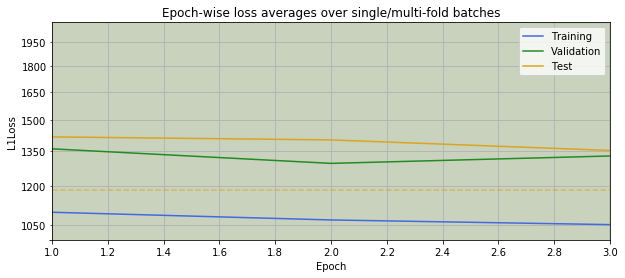

In [13]:
from field_analysis.model.nets.cnn import DroneYieldMeanCNN
from field_analysis.model.dataset.dataperiod import DroneNDVIEarlier
from torch import optim
%matplotlib inline

dataset = DroneNDVIEarlier(db_name='field_analysis_10m_32px.db')

cnn = DroneYieldMeanCNN(
    source_bands=1, 
    source_dim=32,
    cnn_layers=8,
    fc_layers=2,
    optimizer=optim.Adadelta,
    optimizer_parameters={'lr':0.5,'weight_decay':0.1})
_ = cnn.train(
    epochs=3, 
    training_data=dataset,
    k_cv_folds=3,
    early_stopping_patience=20)
_ = cnn.train(
    epochs=3, 
    training_data=dataset,
    k_cv_folds=3,
    early_stopping_patience=20)

### 4.2 32x32 RGB images

Starting the training with GPU:
[   1/   3] (0m 15s) 	Mean Loss:	Train=2050.72 +-2060.29	Test=1888.64 +-1112.11
[   2/   3] (0m 27s) 	Mean Loss:	Train=1149.46 +-1056.27	Test=1597.26 +-1055.38
[   3/   3] (0m 40s) 	Mean Loss:	Train=1087.75 +-1028.47	Test=1529.93 +-1037.17
Saving the model to /home/nevavuor/crop-field-cnn/models/20181215_151510934_Adadelta_3x32x32_8cnn_2fc.pkl
Best Test Loss: 1529.93


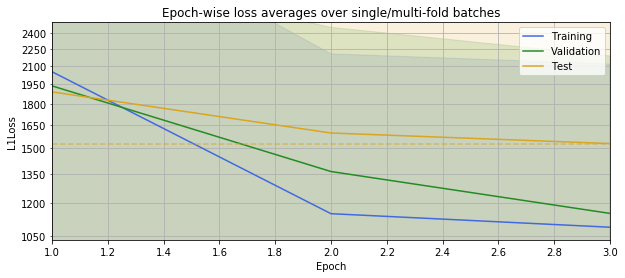

Starting the training with GPU:
[   1/   3] (0m 14s) 	Mean Loss:	Train=1112.89 +-1046.40	Test=1234.39 +-953.59
[   2/   3] (0m 26s) 	Mean Loss:	Train=1085.83 +-1043.06	Test=1331.24 +-963.58
[   3/   3] (0m 39s) 	Mean Loss:	Train=1049.32 +-1025.78	Test=1204.95 +-937.36
Saving the model to /home/nevavuor/crop-field-cnn/models/20181215_151510934_Adadelta_3x32x32_8cnn_2fc.pkl
Best Test Loss: 1204.95


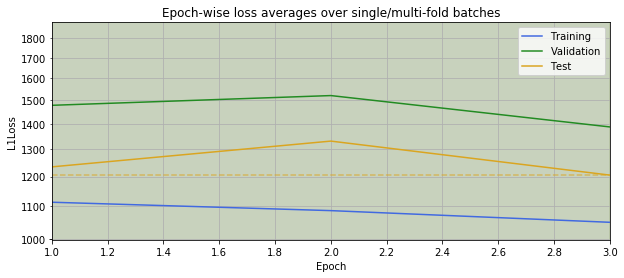

In [14]:
from field_analysis.model.nets.cnn import DroneYieldMeanCNN
from field_analysis.model.dataset.dataperiod import DroneRGBEarlier
from torch import optim
%matplotlib inline

dataset = DroneRGBEarlier(db_name='field_analysis_10m_32px.db')

cnn = DroneYieldMeanCNN(
    source_bands=3, 
    source_dim=32,
    cnn_layers=8,
    fc_layers=2,
    optimizer=optim.Adadelta,
    optimizer_parameters={'lr':0.5,'weight_decay':0.1})
_ = cnn.train(
    epochs=3, 
    training_data=dataset,
    k_cv_folds=3,
    early_stopping_patience=20)
_ = cnn.train(
    epochs=3, 
    training_data=dataset,
    k_cv_folds=3,
    early_stopping_patience=20)

### 4.3 128x128 RGB images

Starting the training with GPU:
[   1/   3] (0m 53s) 	Mean Loss:	Train=1538.11 +-1439.75	Test=1350.40 +-834.07
[   2/   3] (1m 28s) 	Mean Loss:	Train=946.46 +-775.49	Test=1184.87 +-721.68
[   3/   3] (2m  2s) 	Mean Loss:	Train=872.04 +-735.10	Test=1035.06 +-700.37
Saving the model to /home/nevavuor/crop-field-cnn/models/20181215_151630580_Adadelta_3x128x128_8cnn_2fc.pkl
Best Test Loss: 1035.06


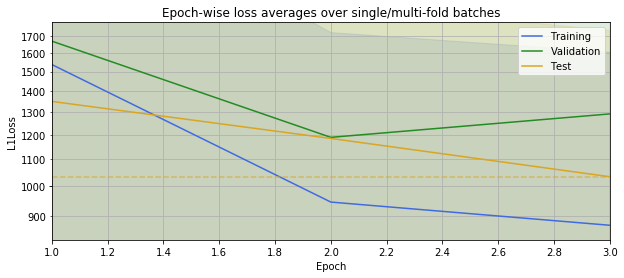

Starting the training with GPU:
[   1/   3] (0m 47s) 	Mean Loss:	Train=833.82 +-724.44	Test=1129.23 +-738.27
[   2/   3] (1m 21s) 	Mean Loss:	Train=796.36 +-723.09	Test=955.77 +-759.13
[   3/   3] (1m 56s) 	Mean Loss:	Train=753.35 +-721.58	Test=1194.97 +-697.89
Saving the model to /home/nevavuor/crop-field-cnn/models/20181215_151630580_Adadelta_3x128x128_8cnn_2fc.pkl
Best Test Loss: 955.77


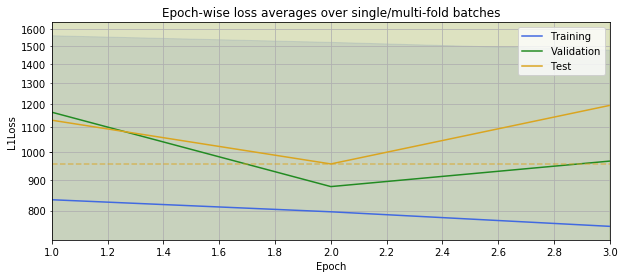

In [15]:
from field_analysis.model.nets.cnn import DroneYieldMeanCNN
from field_analysis.model.dataset.dataperiod import DroneRGBEarlier
from torch import optim
%matplotlib inline

dataset = DroneRGBEarlier(db_name='field_analysis_40m_128px.db')

cnn = DroneYieldMeanCNN(
    source_bands=3, source_dim=128, 
    cnn_layers=8,
    fc_layers=2,
    optimizer=optim.Adadelta,
    optimizer_parameters={'lr':0.5,'weight_decay':0.1})
_ = cnn.train(
    epochs=3, 
    training_data=dataset,
    k_cv_folds=3,
    early_stopping_patience=20)
_ = cnn.train(
    epochs=3, 
    training_data=dataset,
    k_cv_folds=3,
    early_stopping_patience=20)